In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        #for normalizing the data

In [2]:
# importing the dataset
diabetes_df = pd.read_csv("D:\datasets\diabetes_clean.csv")
print("\n The number of rows and columns in the data: ", diabetes_df.shape)
print(" ")
print(diabetes_df.head())


 The number of rows and columns in the data:  (768, 9)
 
   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [35]:
#defining feature and target variable.
X_features = (diabetes_df.drop("glucose", axis = 1)).columns
print(X_features)

X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
print(X)

#normalizing the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
print("Normalized data:\n", X_norm)

#spliting the data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state = 42)

Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')
[[ 6.    72.    35.    ...  0.627 50.     1.   ]
 [ 1.    66.    29.    ...  0.351 31.     0.   ]
 [ 8.    64.     0.    ...  0.672 32.     1.   ]
 ...
 [ 5.    72.    23.    ...  0.245 30.     0.   ]
 [ 1.    60.     0.    ...  0.349 47.     1.   ]
 [ 1.    70.    31.    ...  0.315 23.     0.   ]]
Normalized data:
 [[ 0.63994726  0.14964075  0.90726993 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -0.16054575  0.53090156 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019 -0.26394125 -1.28821221 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.14964075  0.15453319 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505 -0.47073225 -1.28821221 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505  0.04624525  0.65635768 ... -0.47378505 -0.87137393
  -0.73212021]]


In [38]:
#using linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)        
y_pred = reg.predict(X_test) 

print("Prediction on test_set: ", y_pred[:4])
print("Target value: ", y_test[:4])


Prediction on test_set:  [119.91303675  95.70325357 104.63962314 114.05040231]
Target value:  [ 98 112 108 107]


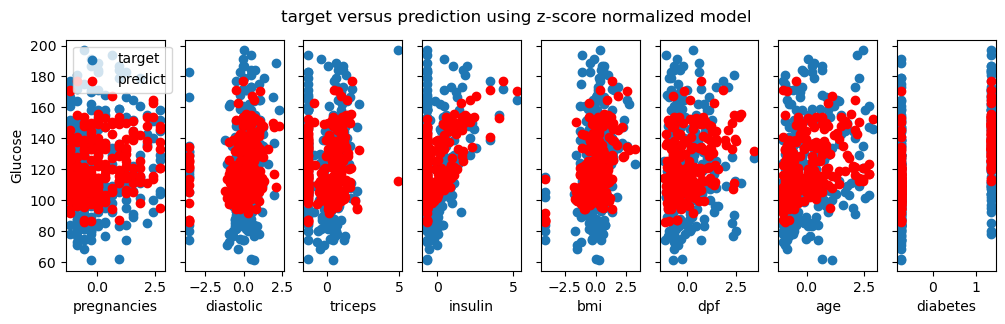

In [42]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,8,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test[:,i],y_pred,color="r", label = 'predict')
ax[0].set_ylabel("Glucose"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()